In [1]:
import time
start_time=time.time()

In [2]:
#from pathlib import Path

from matplotlib import pyplot as plt
import seaborn as sns
from scipy import interpolate
import numpy as np
import pandas as pd
import json
import itertools
from astropy.io import fits
import astropy.units as u

Text(0.5, 1.0, 'H$_{α}$ Flux')

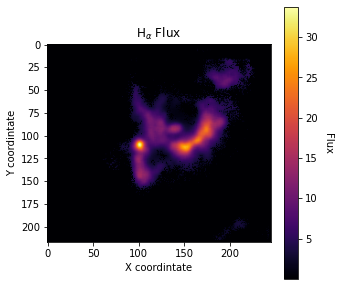

In [3]:
FitsFile= 'Obs/TAURUS.604.OIII.Flux'
hdul=fits.open(FitsFile + '.fits')
fig, ax = plt.subplots(figsize=(5, 5))
image_data=hdul[0].data
plt.imshow(image_data, cmap='inferno')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('Flux', rotation=270, labelpad=15)  
plt.title('H$_{α}$ Flux')

In [4]:
flx=hdul[0].data
df=pd.DataFrame(flx)
dffx=df.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'I'})
dffx.describe()

,X,Y,I
count,53165.000000,53165.000000,5.316500e+04
mean,108.000000,122.000000,1.296366e+00
std,62.642428,70.725484,3.449498e+00
min,0.000000,0.000000,8.434807e-09
25%,54.000000,61.000000,8.434807e-09
50%,108.000000,122.000000,8.434807e-09
75%,162.000000,183.000000,8.434807e-09
max,216.000000,244.000000,3.374002e+01


Text(0.5, 1.0, 'H$_{α}$ Radial Velocity')

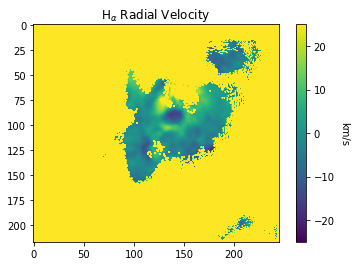

In [5]:
FitsFile= 'Obs/TAURUS.604.OIII.RV'
hdul=fits.open(FitsFile + '.fits')
image_data=hdul[0].data
plt.imshow(image_data, cmap='viridis')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('km/s', rotation=270, labelpad=15)  
plt.clim(-25,25) 
plt.title('H$_{α}$ Radial Velocity')

In [6]:
vel=hdul[0].data
df=pd.DataFrame(vel)
dfvr=df.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'RV'})
dfvr.describe()

,X,Y,RV
count,53165.000000,53165.000000,53165.000000
mean,108.000000,122.000000,159.964736
std,62.642428,70.725484,76.438049
min,0.000000,0.000000,-20.419067
25%,54.000000,61.000000,196.610001
50%,108.000000,122.000000,196.610001
75%,162.000000,183.000000,196.610001
max,216.000000,244.000000,196.610001


Text(0.5, 1.0, 'H$_{α}$ σ$_{disp}$')

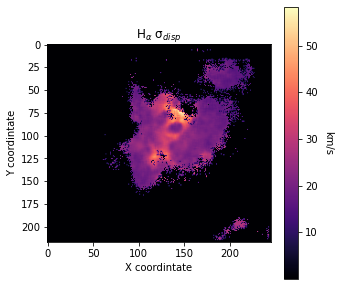

In [7]:
FitsFile= 'Obs/TAURUS.604.OIII.Sigma'
hdul=fits.open(FitsFile + '.fits')
fig, ax = plt.subplots(figsize=(5, 5))
image_data=hdul[0].data
plt.imshow(image_data, cmap='magma')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('km/s', rotation=270, labelpad=15)  
#plt.gca().invert_yaxis()
plt.title('H$_{α}$ σ$_{disp}$')

In [8]:
sig=hdul[0].data
df=pd.DataFrame(sig)
df=df.reindex(index=df.index[::-1])
dsig=df.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'Sig'})
dsig.describe()

,X,Y,Sig
count,53165.000000,53165.000000,5.316500e+04
mean,108.000000,122.000000,4.433354e+00
std,62.642428,70.725484,9.644502e+00
min,0.000000,0.000000,1.457178e-08
25%,54.000000,61.000000,1.457178e-08
50%,108.000000,122.000000,1.457178e-08
75%,162.000000,183.000000,1.457178e-08
max,216.000000,244.000000,5.829112e+01


In [9]:
data=dfvr
data['I']=dffx.I
data['Sig']=dsig.Sig
data.describe()

,X,Y,RV,I,Sig
count,53165.000000,53165.000000,53165.000000,5.316500e+04,5.316500e+04
mean,108.000000,122.000000,159.964736,1.296366e+00,4.433354e+00
std,62.642428,70.725484,76.438049,3.449498e+00,9.644502e+00
min,0.000000,0.000000,-20.419067,8.434807e-09,1.457178e-08
25%,54.000000,61.000000,196.610001,8.434807e-09,1.457178e-08
50%,108.000000,122.000000,196.610001,8.434807e-09,1.457178e-08
75%,162.000000,183.000000,196.610001,8.434807e-09,1.457178e-08
max,216.000000,244.000000,196.610001,3.374002e+01,5.829112e+01


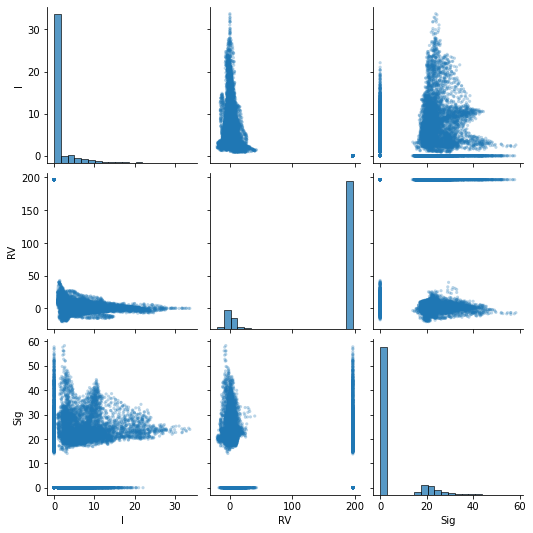

In [10]:
sns.pairplot(data, 
             vars=["I","RV","Sig"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

In [11]:
mI=(data.I>data.I.mean()+0.5*data.I.std())#&(data.Sig>data.Sig.mean()+0.5*data.Sig.std())
data=data[mI]

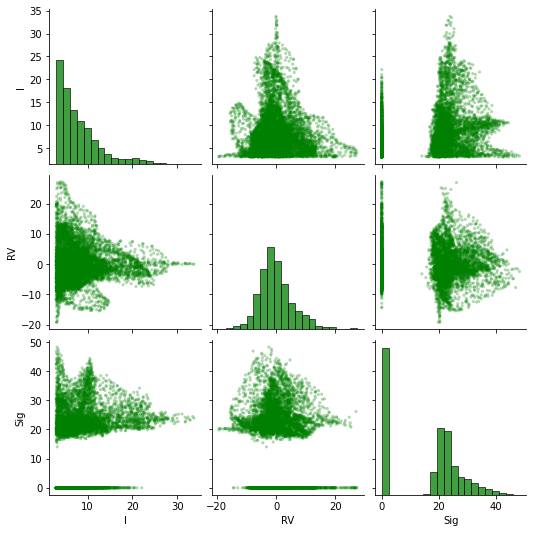

In [12]:
sns.pairplot(data, 
             vars=["I","RV","Sig"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none',color='green'),
             diag_kws=dict(bins=20, color="green"),
            )

In [13]:
data.describe()

,X,Y,RV,I,Sig
count,8048.000000,8048.000000,8048.000000,8048.000000,8.048000e+03
mean,91.485089,146.741923,0.006149,8.037498,1.539379e+01
std,33.234218,36.695132,5.941744,4.884292,1.258947e+01
min,15.000000,82.000000,-19.278046,3.022367,1.457178e-08
25%,70.000000,112.000000,-3.625504,4.467504,1.457178e-08
50%,95.000000,145.000000,-0.816818,6.512358,2.036765e+01
75%,115.000000,179.000000,2.928085,10.051174,2.384243e+01
max,199.000000,226.000000,27.211472,33.740025,4.820989e+01


In [14]:
data.sem()

X      0.370460
Y      0.409039
RV     0.066232
I      0.054445
Sig    0.140334
dtype: float64

Text(0.5, 1.0, 'H$_{α}$ Flux')

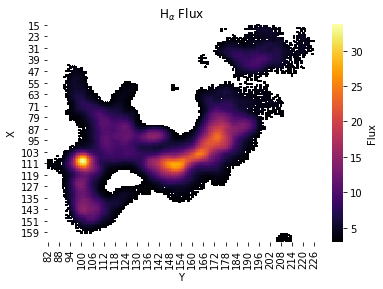

In [15]:
datal=data.copy()
#datal.I=np.log10(datal.I)
datal.X=datal.X.astype(int)
dataH_f=(datal.round(2)).pivot(index='X', columns='Y', values='I')
sns.heatmap(dataH_f, cmap="inferno",xticklabels='auto',cbar_kws={'label': 'Flux'})
plt.title('H$_{α}$ Flux')

Text(0.32, 0.9, '60 pc')

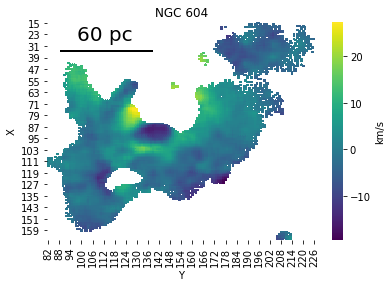

In [16]:

fig = plt.figure()
ax = fig.add_subplot()

datal=data.copy()

dataH_rv=(datal.round(2)).pivot(index='X', columns='Y', values='RV')
sns.heatmap(dataH_rv, cmap="viridis",cbar_kws={'label': 'km/s'})
plt.title('NGC 604')

plt.axhline(y=20, xmin=0.05, xmax=0.39, linewidth=2, color = 'k')

ax.text(0.32, 0.9, '60 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)


Text(0.5, 1.0, 'H$_{α}$ σ')

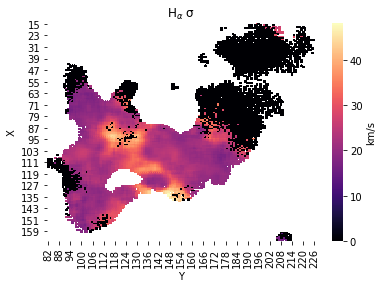

In [17]:
datal=data.copy()
dataH_s=(datal.round(2)).pivot(index='X', columns='Y', values='Sig')
sns.heatmap(dataH_s, cmap="magma",cbar_kws={'label': 'km/s'})
plt.title('H$_{α}$ σ')
#plt.savefig('TAURUS/Imgs/A/'+reg+'SH.png')

In [18]:
data['SigDisp']=(data.Sig**2-9.08**2-14.5**2)**0.5

<ipython-input-18-f66476a56c25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SigDisp']=(data.Sig**2-9.08**2-14.5**2)**0.5


In [19]:
data.describe()

,X,Y,RV,I,Sig,SigDisp
count,8048.000000,8048.000000,8048.000000,8048.000000,8.048000e+03,5035.000000
mean,91.485089,146.741923,0.006149,8.037498,1.539379e+01,16.878636
std,33.234218,36.695132,5.941744,4.884292,1.258947e+01,7.309854
min,15.000000,82.000000,-19.278046,3.022367,1.457178e-08,0.309513
25%,70.000000,112.000000,-3.625504,4.467504,1.457178e-08,11.712958
50%,95.000000,145.000000,-0.816818,6.512358,2.036765e+01,15.190462
75%,115.000000,179.000000,2.928085,10.051174,2.384243e+01,20.816977
max,199.000000,226.000000,27.211472,33.740025,4.820989e+01,45.072130


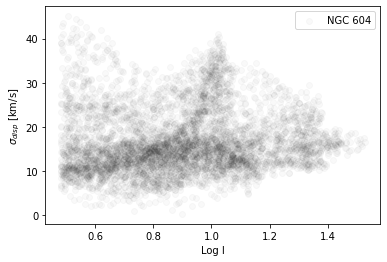

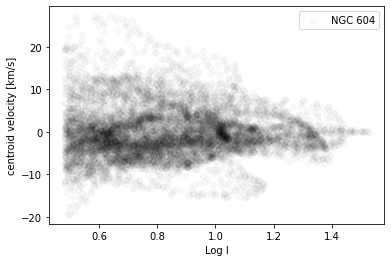

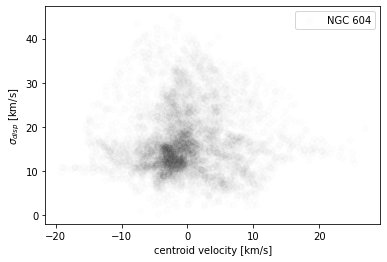

In [20]:
fig, ax = plt.subplots()
plt.scatter(np.log10(data.I),data.SigDisp, alpha=0.025, color='k',label='NGC 604')

ax.set_xlabel('Log I')
ax.set_ylabel('$σ_{disp}$ [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(np.log10(data.I),data.RV, alpha=0.025, color='k',label='NGC 604')

ax.set_xlabel('Log I')
ax.set_ylabel('centroid velocity [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(data.RV,data.SigDisp, alpha=0.008, color='k',label='NGC 604')

ax.set_xlabel('centroid velocity [km/s]')
ax.set_ylabel('$σ_{disp}$ [km/s]')
plt.legend()



Text(0.5, 6.79999999999999, 'Radial velocity [km/s]')

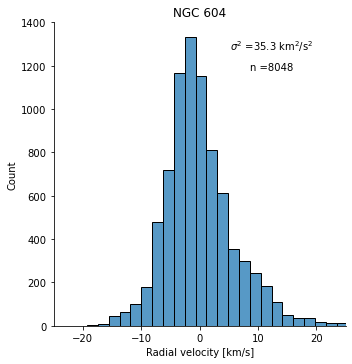

In [21]:
#fig, ax = plt.subplots()

sns.displot(data.RV-data.RV.mean(),bins=25)
plt.xlim(-25,25)

plt.text(0.65, 1.20,'n ='+str(data.RV.count()), ha='center', va='center', transform=ax.transAxes, color='k')
#plt.text(0.70, 0.82,'$μ$ ='+str(np.round(data.RV.mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.65, 1.3,'$σ^{2}$ ='+str(np.round(data.RV.var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('NGC 604')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

plt.xlabel('Radial velocity [km/s]')

In [22]:
N604O = {'N604O' : data,
      }
N604O

{'N604O':          X    Y        RV         I           Sig    SigDisp
 3870    15  195 -4.035110  3.387994  2.878883e+01  23.153845
 3871    15  196 -4.444702  3.593275  1.457178e-08        NaN
 4111    16  191 -3.215897  3.059080  1.457178e-08        NaN
 4112    16  192 -3.976578  3.273674  1.457178e-08        NaN
 4114    16  194 -3.362183  4.095469  1.457178e-08        NaN
 ...    ...  ...       ...       ...           ...        ...
 48962  199  207 -8.101837  3.071058  1.675537e+01        NaN
 48964  199  209 -7.253372  3.067847  1.607495e+01        NaN
 48966  199  211 -0.963104  3.107347  1.570671e+01        NaN
 48967  199  212  1.553009  3.142246  1.457178e-08        NaN
 48968  199  213  3.864319  3.138125  1.457178e-08        NaN
 
 [8048 rows x 6 columns]}

In [23]:
import pickle

f = open('VF\\N604O.pkl',"wb")
pickle.dump(data,f)
f.close()

In [24]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 13.162967920303345 seconds ---
